In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime

#### Figure aesthetics

In [2]:
#print(plt.style.available)
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

#### Downlad data

In [3]:
def get_data():
    ##Get data from the source that is used to generate map (based on WHO official data):
    ##https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html?fbclid=IwAR0oKIKJlc-zeNZGFBVEN0-O-58daoCDaKicXwC10cjFWgCZqTPgavseTfI#/bda7594740fd40299423467b48e9ecf6
    url = "https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
    r = requests.get(url)

    filename="data.csv"
    f = open(filename,'wb')
    f.write(r.content)

In [4]:
get_data()

#### Prepare dataset

In [5]:
## prepare dataset
data = pd.read_csv("data.csv")
data=data.drop(columns=["Province/State", "Lat", "Long"])
## aggregate data for each country
data=data.groupby("Country/Region").sum().reset_index()
## reshape data
data.reset_index(drop=True, inplace=True)
data=data.set_index("Country/Region")
data=data.transpose().reset_index().rename(columns={'index':'Date'})
data['Date'] = pd.to_datetime(data['Date'])

#### List of countries in dataset

In [ ]:
for el in data.columns:
    print(el)

#### Choose countries to plot (separate by "," no spaces)

In [6]:
countries_to_plot="Poland,Germany,Italy".split(",")

#### Make plot

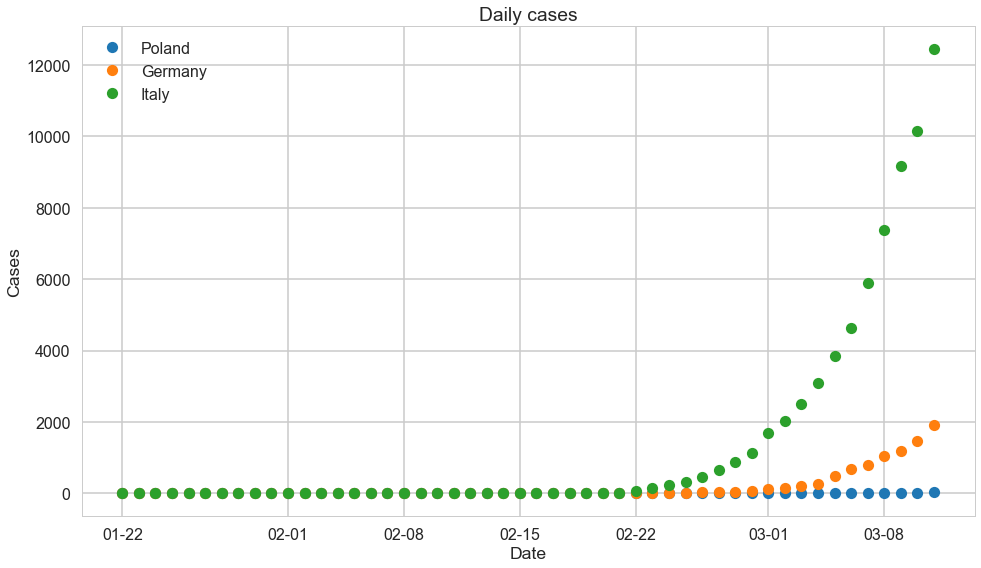

In [7]:
##extract data for each country
dates=data["Date"].values
countries=[]
for country in countries_to_plot:
    countries.append(data[country].values)

## Create figure and plot space
fig, ax = plt.subplots(figsize=(16, 9))
## Add x-axis and y-axis
for country, country_name in zip(countries, countries_to_plot):
    ax.plot(dates, country, "o", label=country_name)
## Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Daily cases")
## Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

## axes limits
#ax.set_xlim([datetime.date(2020, 2, 10), datetime.date.today() + datetime.timedelta(days=3)])# datetime.date(2020, 3, 15)])
#ax.set_ylim([0,100])
ax.legend()
plt.show()